# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Loading the Data

In [3]:
data = pd.read_csv('Wine_clust.csv')

In [4]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
data.tail()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [6]:
data.shape

(178, 13)

In [7]:
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [9]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [10]:
data.corr()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Ash_Alcanity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total_Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid_Phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Color_Intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


In [11]:
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

### Detecting Outliers

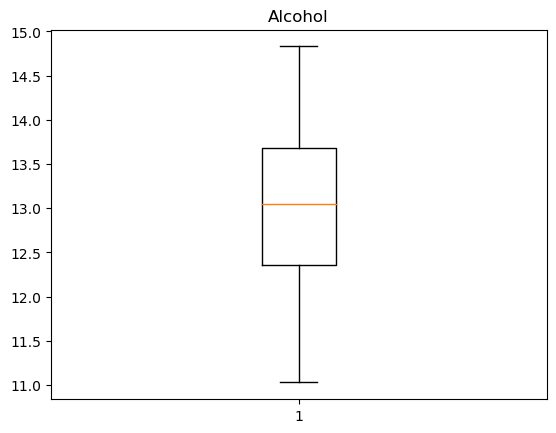

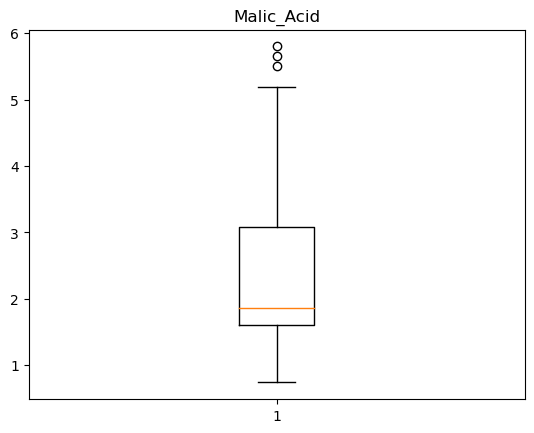

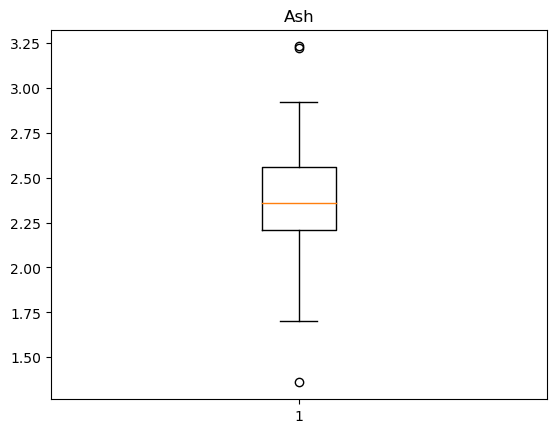

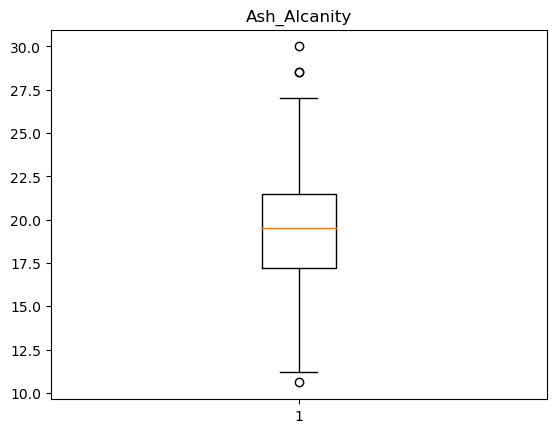

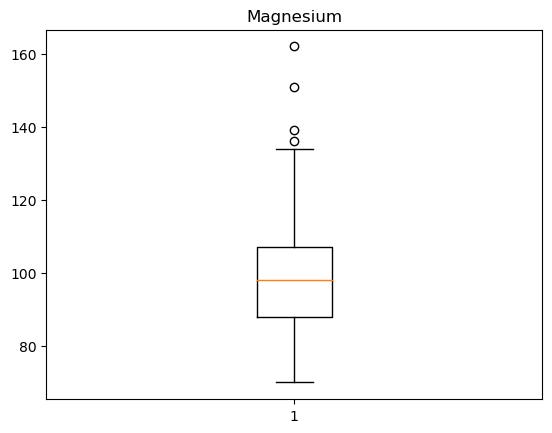

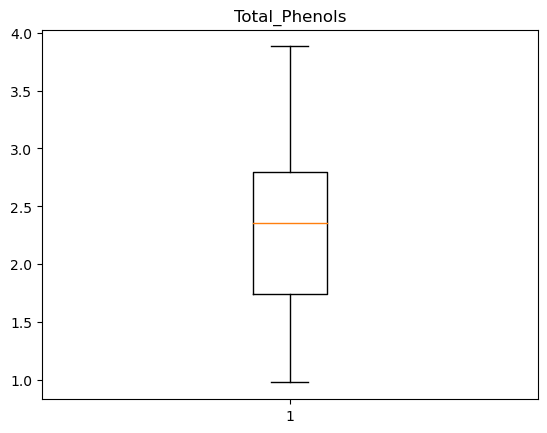

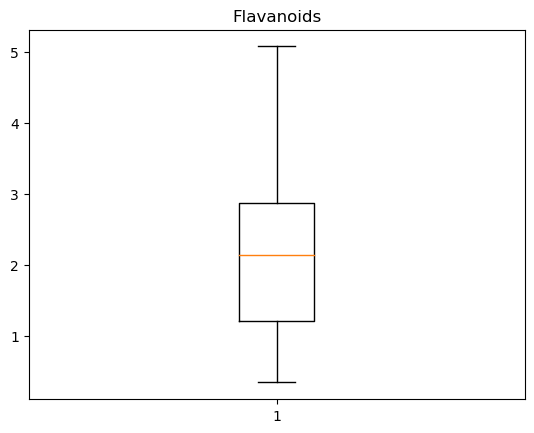

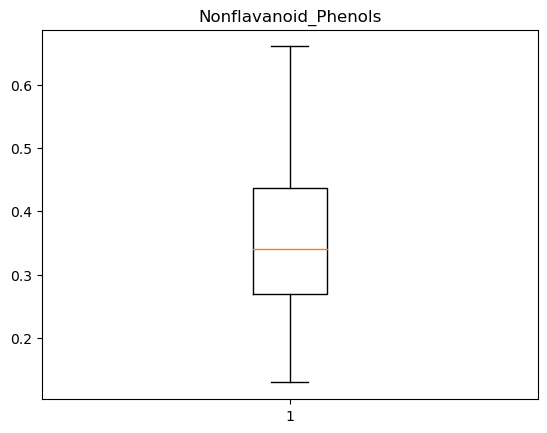

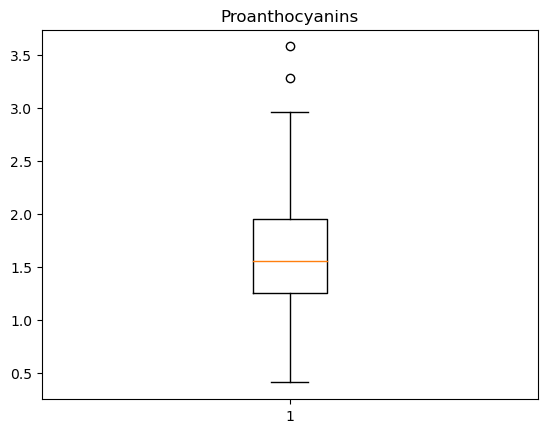

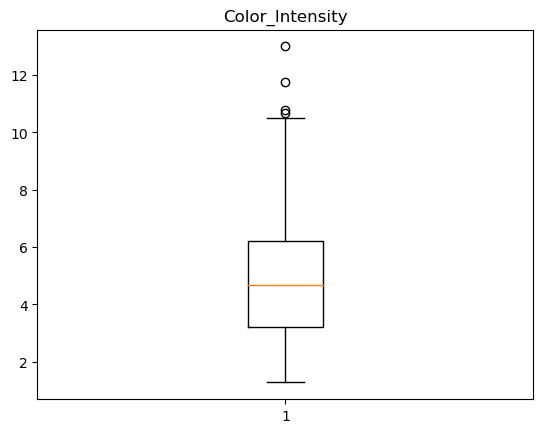

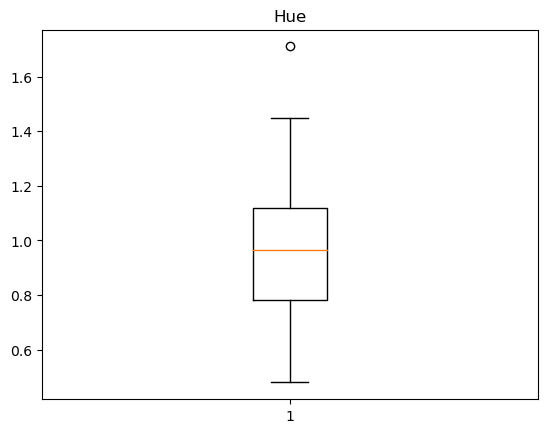

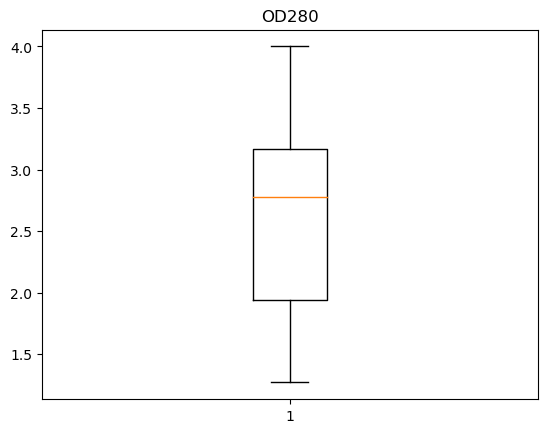

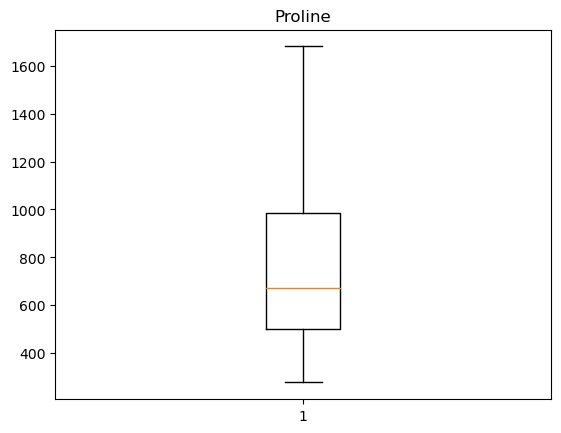

In [12]:
for i in ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium','Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols','Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

##### Malic_Acid

In [13]:
Q1 = np.percentile(data['Malic_Acid'],25,interpolation='midpoint')
Q2 = np.percentile(data['Malic_Acid'],50,interpolation='midpoint')
Q3 = np.percentile(data['Malic_Acid'],75,interpolation='midpoint')

In [14]:
IQR = Q3 - Q1
IQR

1.46

In [15]:
low_lim = Q1-1.5*IQR
low_lim

-0.585

In [16]:
up_lim = Q2+1.5*IQR
up_lim

4.055

In [17]:
data['Malic_Acid']=np.where(data['Malic_Acid']>up_lim,up_lim,np.where(data['Malic_Acid']<low_lim,low_lim,data['Malic_Acid']))

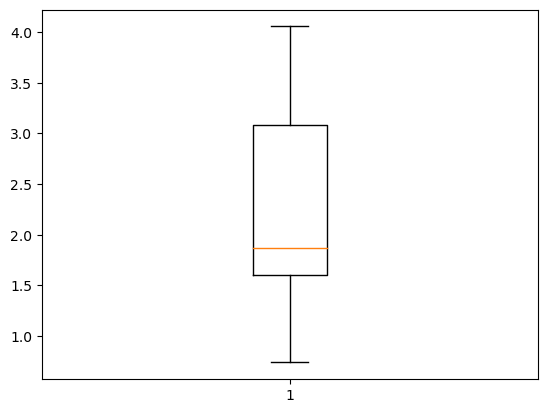

In [18]:
plt.figure()
plt.boxplot(data['Malic_Acid'])
plt.show()

##### Magnesium

In [19]:
Q1 = np.percentile(data['Magnesium'],25,interpolation='midpoint')
Q2 = np.percentile(data['Magnesium'],50,interpolation='midpoint')
Q3 = np.percentile(data['Magnesium'],75,interpolation='midpoint')

In [20]:
IQR = Q3 - Q1
IQR

19.0

In [21]:
low_lim = Q1-1.5*IQR
low_lim

59.5

In [22]:
up_lim = Q2+1.5*IQR
up_lim

126.5

In [23]:
data['Magnesium']=np.where(data['Magnesium']>up_lim,up_lim,np.where(data['Magnesium']<low_lim,low_lim,data['Magnesium']))

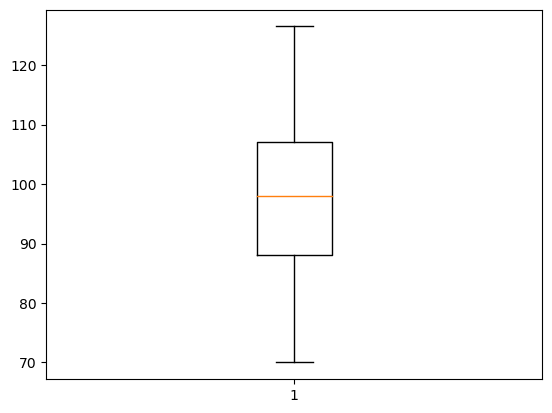

In [24]:
plt.figure()
plt.boxplot(data['Magnesium'])
plt.show()

##### Color_Intensity

In [25]:
Q1 = np.percentile(data['Color_Intensity'],25,interpolation='midpoint')
Q2 = np.percentile(data['Color_Intensity'],50,interpolation='midpoint')
Q3 = np.percentile(data['Color_Intensity'],75,interpolation='midpoint')

In [26]:
IQR = Q3 - Q1
IQR

2.97

In [27]:
low_lim = Q1-1.5*IQR
low_lim

-1.225

In [28]:
up_lim = Q2+1.5*IQR
up_lim

9.145

In [29]:
data['Color_Intensity']=np.where(data['Color_Intensity']>up_lim,up_lim,np.where(data['Color_Intensity']<low_lim,low_lim,data['Color_Intensity']))

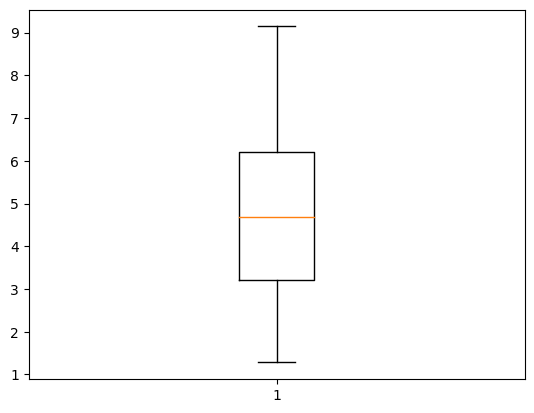

In [30]:
plt.figure()
plt.boxplot(data['Color_Intensity'])
plt.show()

##### Proanthocyanins

In [31]:
Q1 = np.percentile(data['Proanthocyanins'],25,interpolation='midpoint')
Q2 = np.percentile(data['Proanthocyanins'],50,interpolation='midpoint')
Q3 = np.percentile(data['Proanthocyanins'],75,interpolation='midpoint')

In [32]:
IQR = Q3 - Q1
IQR

0.7

In [33]:
low_lim = Q1-1.5*IQR
low_lim

0.20000000000000018

In [34]:
up_lim = Q2+1.5*IQR
up_lim

2.605

In [35]:
data['Proanthocyanins']=np.where(data['Proanthocyanins']>up_lim,up_lim,np.where(data['Proanthocyanins']<low_lim,low_lim,data['Proanthocyanins']))

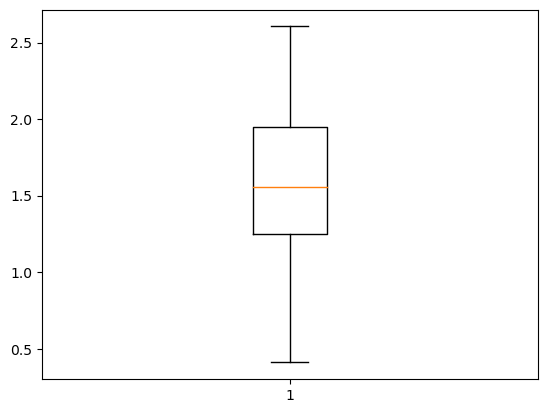

In [36]:
plt.figure()
plt.boxplot(data['Proanthocyanins'])
plt.show()

##### Ash_Alcanity

In [37]:
Q1 = np.percentile(data['Ash_Alcanity'],25,interpolation='midpoint')
Q2 = np.percentile(data['Ash_Alcanity'],50,interpolation='midpoint')
Q3 = np.percentile(data['Ash_Alcanity'],75,interpolation='midpoint')

In [38]:
IQR = Q3 - Q1
IQR

4.300000000000001

In [39]:
low_lim = Q1-1.5*IQR
low_lim

10.749999999999998

In [40]:
up_lim = Q2+1.5*IQR
up_lim

25.950000000000003

In [41]:
data['Ash_Alcanity']=np.where(data['Ash_Alcanity']>up_lim,up_lim,np.where(data['Ash_Alcanity']<low_lim,low_lim,data['Ash_Alcanity']))

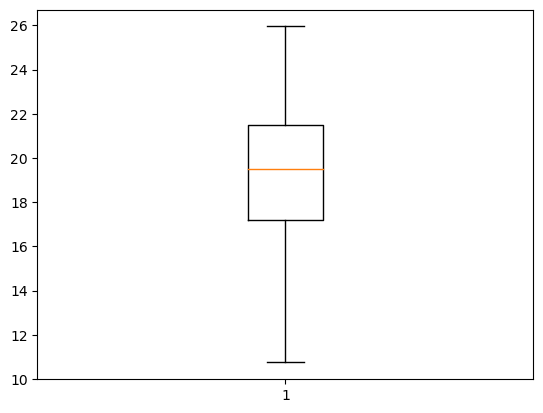

In [42]:
plt.figure()
plt.boxplot(data['Ash_Alcanity'])
plt.show()

### Scaling The Data

In [43]:
sc = StandardScaler()

In [44]:
df = sc.fit_transform(data)

In [45]:
df

array([[ 1.51861254, -0.57740236,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.50574465, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.0879906 ,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.82313068, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.32343734,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.82313068,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [46]:
df = pd.DataFrame(df,columns=data.columns)

In [47]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.577402,0.232053,-1.205846,2.151502,0.808997,1.034819,-0.659563,1.369986,0.316922,0.362177,1.847920,1.013009
1,0.246290,-0.505745,-0.827996,-2.589305,0.063306,0.568648,0.733629,-0.820719,-0.555406,-0.280458,0.406051,1.113449,0.965242
2,0.196879,0.087991,1.109334,-0.262578,0.142105,0.808997,1.215533,-0.498407,1.970480,0.335887,0.318304,0.788587,1.395148
3,1.691550,-0.331719,0.487926,-0.828539,1.087704,2.491446,1.466525,-0.981875,1.160290,1.341004,-0.427544,1.184071,2.334574
4,0.295700,0.323437,1.840403,0.492036,1.481703,0.808997,0.663351,0.226796,0.474012,-0.308905,0.362177,0.449601,-0.037874


# KMeans

In [48]:
wcss=[]
for i in range(1,16):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

In [49]:
wcss

[2314.0,
 1652.656499326398,
 1251.009183347178,
 1158.9722883319573,
 1087.3872870826815,
 1025.160599988585,
 966.5398071817469,
 924.0416877508724,
 892.8988513592387,
 862.1596037560366,
 834.588113338823,
 793.104779608084,
 770.371026550585,
 749.0340531334574,
 725.9893216174678]

#### Elbow Method

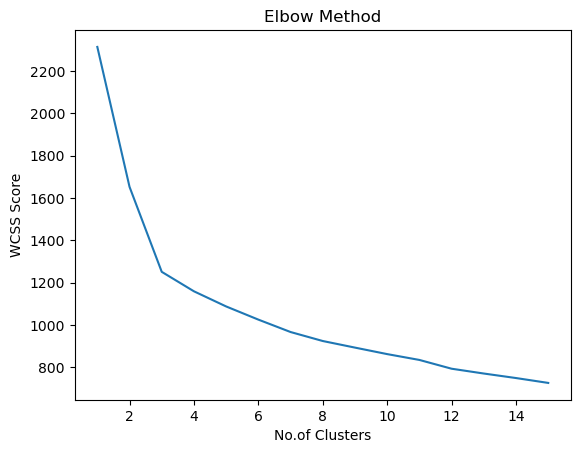

In [50]:
plt.plot(range(1,16),wcss)
plt.title('Elbow Method')
plt.xlabel('No.of Clusters')
plt.ylabel('WCSS Score')
plt.show()

In [51]:
kmeans = KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans = kmeans.fit_predict(df)

In [52]:
y_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [53]:
silhouette_score = silhouette_score(df,y_kmeans)

In [54]:
silhouette_score

0.2904472883651663

# Agglomerative HC

#### Dendrogram

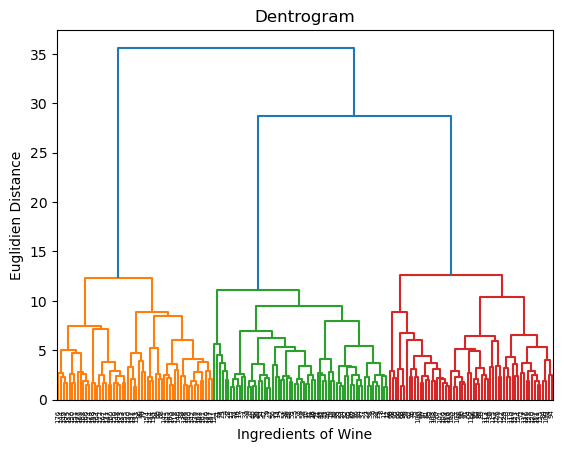

In [55]:
dendrogram = sch.dendrogram(sch.linkage(df,method='ward'))
plt.title('Dentrogram')
plt.xlabel('Ingredients of Wine')
plt.ylabel('Euglidien Distance')
plt.show()

In [56]:
hc = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')

In [57]:
y_hc = hc.fit_predict(df)

In [58]:
y_hc

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 2,
       0, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

# PCA

In [59]:
pca = PCA(0.99)
pca.fit(df)
x_pca = pca.transform(df)

In [60]:
x_pca.shape

(178, 12)

In [61]:
x_pca

array([[ 3.43229782, -1.54494778, -0.12287136, ..., -1.0741535 ,
        -0.17218384,  0.6377715 ],
       [ 2.24265293,  0.34236214, -2.0642721 , ..., -0.30787908,
        -0.25137316,  0.29032402],
       [ 2.47872564, -1.01732854,  1.00095784, ..., -0.09883484,
        -0.28670584,  0.00519995],
       ...,
       [-2.59390334, -2.83482493, -0.90076886, ...,  0.22555249,
         0.50811109,  0.47344296],
       [-2.33845427, -2.55035209, -0.55945941, ..., -0.41120034,
         0.4124264 ,  0.48334397],
       [-3.2450087 , -2.94051168,  1.04307426, ...,  0.3220306 ,
        -0.14595161, -0.02889232]])

In [62]:
pca.explained_variance_ratio_

array([0.36614202, 0.2015681 , 0.11011674, 0.06931232, 0.06131904,
       0.04599547, 0.03849118, 0.02801771, 0.02199911, 0.01958519,
       0.01667171, 0.01298974])

In [63]:
np.sum(pca.explained_variance_ratio_)

0.9922083172977196

# DBSCAN

In [64]:
from collections import Counter

In [65]:
model = DBSCAN(eps=0.5, min_samples=20).fit(df)

In [66]:
model

DBSCAN(min_samples=20)

In [67]:
outliers_df = pd.DataFrame(df)

print(Counter(model.labels_))

Counter({-1: 178})


In [68]:
model.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

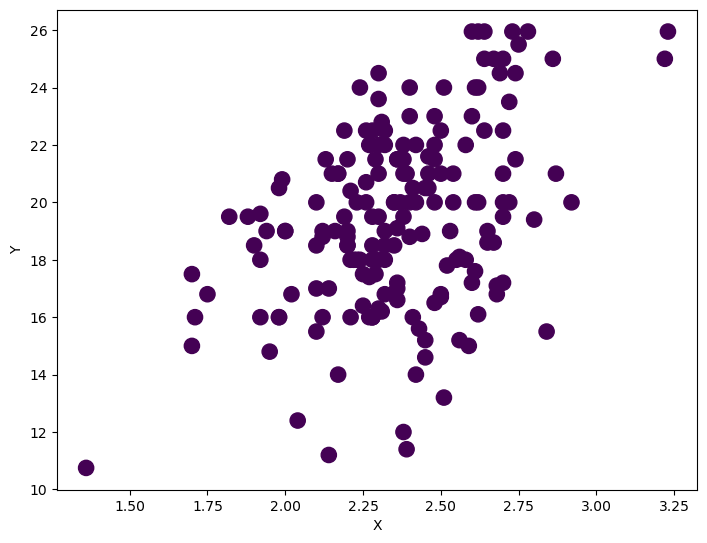

In [69]:
fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])

colors = model.labels_

ax.scatter(data['Ash'],data['Ash_Alcanity'], c=colors, s=120)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()

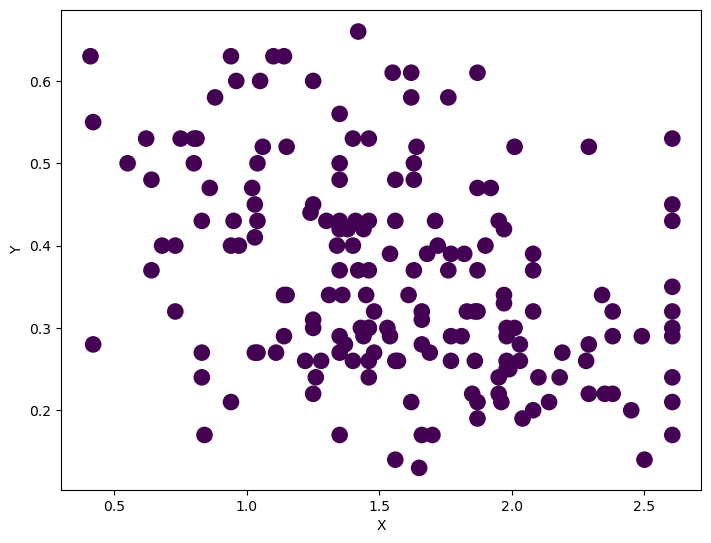

In [70]:
fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])

ax.scatter(data['Proanthocyanins'],data['Nonflavanoid_Phenols'], c=colors, s=120)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()